# Модуль 1

## 1.1 Парсинг данных

In [24]:
# Импорт библиотек для работы
import re #библиотека поддержки регулярных выражений
import json #библиотека для работы с json файлами
import requests #библиотека для выполнения HTML запросов
import pandas as pd #библиотека для работы с датафреймом
from tqdm import notebook #библиотека для красоты
from bs4 import BeautifulSoup #библиотека для парсинга HTML

In [25]:
#Парсим данные для работы с WEB-сайта
url = f"https://dtp-stat.ru/opendata/" #Вводим сайт в переменную URL

req = requests.get(url) #Делаем запрос с сайта
result = req.content # Берём результат контента сайта

soup = BeautifulSoup(result, 'lxml')

#Ищем файлы для парсинга с сайта
areas_urls_list = []
for tag in soup.find_all("a", 'button')[1:]:
    area_info = tag.get("href")
    areas_urls_list.append('https://dtp-stat.ru/' + area_info)

total_data = pd.DataFrame() #Создаём пустой датафрейм для парсинга данных
for url in notebook.tqdm(areas_urls_list[:-3]):
    data = pd.read_json(url)

    data_dict = data['features']

    data_from_dict = pd.DataFrame(list(data_dict))

    data_geo = data_from_dict['geometry'] #Датасет с геопозицией

    data_new = data_from_dict['properties']
    data_new = pd.DataFrame(list(data_new))

    total_data = pd.concat([total_data, data_new]) #Объединяем старый датаферйм с помощью цикла с новыми

total_data.info() #Проверяем информацию о созданном датасете

  0%|          | 0/85 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772284 entries, 0 to 12708
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      772284 non-null  int64 
 1   tags                    772284 non-null  object
 2   light                   772284 non-null  object
 3   point                   772284 non-null  object
 4   nearby                  772284 non-null  object
 5   region                  772284 non-null  object
 6   scheme                  716323 non-null  object
 7   address                 735096 non-null  object
 8   weather                 772284 non-null  object
 9   category                772284 non-null  object
 10  datetime                772284 non-null  object
 11  severity                772284 non-null  object
 12  vehicles                772284 non-null  object
 13  dead_count              772284 non-null  int64 
 14  participants            772284 non-nu

## 1.3 Описание набора данных

Исходные данные были представленны:

*   `id` - идентификатор	0% пропущенных значений, большой разброс данных
*   `tags` - показатель с оф. сайта ГИБДД
*   `light` - время суток	0% пропущенных значений
*   `point` - координаты	 0% пропущенных значений
*   `nearby` - что расположено рядом с проишествием	0% пропущенных значений
*   `region` - регион		0% пропущенных значений
*   `address` - адресс	4.5% пропущенных значений, большой разброс данных
*   `weather` - погода	0% пропущенных значений
*   `category` - тип ДТП	0% пропущенных значений
*   `datetime` - дата и время проишествия	0% пропущенных значений, большой разброс данных
*   `severity` - тяжесть ДТП, причинён ли вред здоровью\какой		0% пропущенных значений
*   `vehicles` - описание ТС	0% пропущенных значений
  *   `year` - год выпуска
  *   `brand` - бренд
  *   `color` - цвет
  *   `model` - модель
  *   `category` - категория ТС
*   `perticipants` - участники ДТП внутри ТС	0% пропущенных значений
  *   `role` - роль участника
  *   `gender` - пол участника
  *   `violations` - нарушение правил участником
  *   `health_status` - состояние здоровья после ДТП
  *   `years_of_driving_experience` - стаж вождения участником
*   `dead_count` - кол-во смертей в ДТП	0% пропущенных значений
*   `participants` - участники без ТС		0% пропущенных значений
*   `injured_count` - кол-во раненых в ДТП	0% пропущенных значений
*   `parent_region` - Регион	0% пропущенных значений
*   `road_conditions` - состояние дорожного покрытия	0% пропущенных значений
*   `participants_count` - кол-во участников ДТП	0% пропущенных значений
*   `participant_categories` - категория участников	0% пропущенных значений

## 1.2 Предобработка данных и выделение значимых атрибутов

In [26]:
#Удаляем ненужные данные для нашего проекта
df = total_data.drop(['id','tags', 'nearby', 'scheme', 'weather', 'datetime', 'vehicles', 'dead_count', 'participants', 'participant_categories'], axis=1) #Удаляем ненужные данные
df = df.dropna(axis=0) #Удаляем пропущенные значения

geopisition = df['point'].copy() #Копируем координаты в новую таблицу
df = df.drop(['point'], axis=1) #Удаляем ненужные данные

In [27]:
df

,light,region,address,category,severity,injured_count,parent_region,road_conditions,participants_count
0,Светлое время суток,Барнаул,"г Барнаул, пр-кт Калинина, 16В",Столкновение,Легкий,4,Алтайский край,[Сухое],5
2,Светлое время суток,Первомайский район,Р-256 Чуйский тракт Новосибирск - Барнаул - Го...,Столкновение,Тяжёлый,3,Алтайский край,[Сухое],4
3,Светлое время суток,Тальменский район,Р-256 Чуйский тракт Новосибирск - Барнаул - Го...,Опрокидывание,Тяжёлый,1,Алтайский край,[Сухое],2
4,"В темное время суток, освещение отсутствует",Ключевский район,Змеиногорск - Рубцовск - Волчиха - Михайловско...,Наезд на пешехода,С погибшими,0,Алтайский край,[Мокрое],2
5,"В темное время суток, освещение включено",Барнаул,"г Барнаул, ул Солнечная Поляна, 37Б",Наезд на пешехода,Тяжёлый,1,Алтайский край,[Отсутствие элементов обустройства остановочно...,2
...,...,...,...,...,...,...,...,...,...
12704,"В темное время суток, освещение включено",Борисоглебский район,"п Борисоглебский, пл Советская, 1",Наезд на пешехода,Тяжёлый,1,Ярославская область,[Мокрое],2
12705,Светлое время суток,Борисоглебский район,"УГЛИЧ-РОСТОВ, 68 км",Наезд на стоящее ТС,С погибшими,0,Ярославская область,"[Сухое, Отсутствие, плохая различимость горизо...",3
12706,"В темное время суток, освещение отсутствует",Борисоглебский район,"БОРИСОГЛЕБ-ЗАЧАТЬЕ, 27 км",Наезд на велосипедиста,С погибшими,0,Ярославская область,[Сухое],2
12707,Светлое время суток,Борисоглебский район,"УГЛИЧ-РОСТОВ, 70 км",Столкновение,Легкий,1,Ярославская область,"[Сухое, Отсутствие, плохая различимость горизо...",3


In [28]:
geopisition

0        {'lat': 53.361674, 'long': 83.770891}
2        {'lat': 53.379437, 'long': 83.997624}
3         {'lat': 53.852527, 'long': 83.47219}
4         {'lat': 52.21802, 'long': 79.190655}
5        {'lat': 53.358966, 'long': 83.659204}
                         ...                  
12704           {'lat': 57.26, 'long': 39.154}
12705     {'lat': 57.270551, 'long': 39.13197}
12706          {'lat': 57.149, 'long': 37.794}
12707    {'lat': 57.261182, 'long': 39.153482}
12708    {'lat': 57.272106, 'long': 39.154383}
Name: point, Length: 735096, dtype: object

### Визуализация зависимостей данных

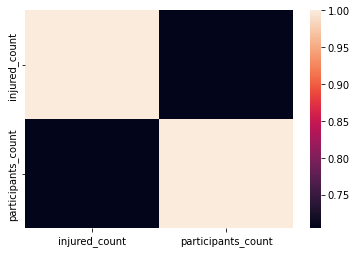

In [29]:
# Импорт библиотеки
import seaborn as sns
# Отображение тепловой карты
sns.heatmap(df.corr());

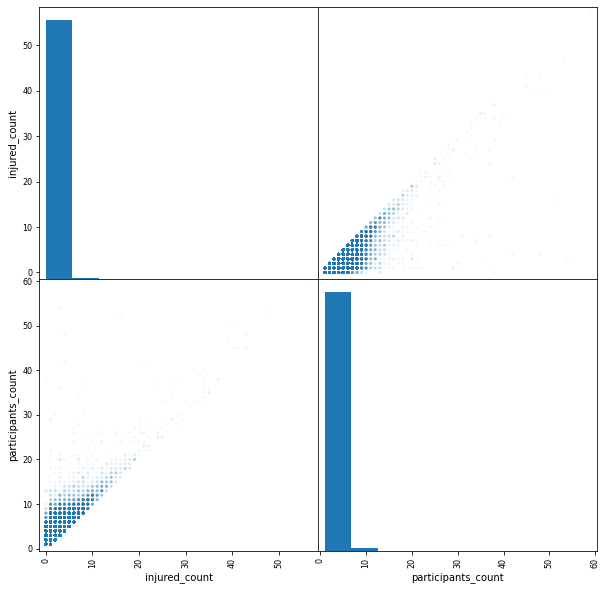

In [30]:
# Импорт библиотеки
from pandas.plotting import scatter_matrix
# Отображение матрицы
scatter_matrix(df, alpha=0.05, figsize=(10, 10));

Из визуализации данных видно, что кол-во участников в ДТП не коррелирует с кол-вом пострадавших в ДТП

Для продолжения работы нужно понять, какие признаки нам будут нужны, а какие нет. Убираем данные, которые по логике нам не нужны, а именно:
*   `id` - признак не несёт в себе информации по статистике ДТП
*   `tags` - признак не несёт в себе информации по статистике ДТП
*   `scheme` - признак не несёт в себе информации по статистике ДТП
*   `datetime` - признак не несёт в себе информации по статистике ДТП
*   `weather` - признак не зависящий от человеческой воли
*   `vehicles` - признак, который не поможет определить влияние на кластеры
*   `nearby` - признак, который содержит объекты, находящиеся рядом с ДТП




## 1.4 Отчёт

In [31]:
#Сохранение в CSV
df.to_csv('C3_M1.csv')
geopisition.to_csv('Geoposition.csv')

In [32]:
#Сохранение HTML
!jupyter nbconvert C3_M1.ipynb --to html

[NbConvertApp] Converting notebook C3_M1.ipynb to html
[NbConvertApp] Writing 317768 bytes to C3_M1.html
